## Movie Reviews
### 5.1

In [2]:
import keras
keras.__version__

'2.4.3'

In [3]:
#import data
from keras.datasets import imdb
#split data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do t

In [4]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    #create all-zero matrix of shape (len(seq), dim)
    results = np.zeros((len(sequences),dimension))
    for i, seq in enumerate(sequences):
        results[i,seq]= 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [5]:
#vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers
#building model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [10]:
#validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5916 - binary_accuracy: 0.7177 - val_loss: 0.3968 - val_binary_accuracy: 0.8697
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3330 - binary_accuracy: 0.9030 - val_loss: 0.3107 - val_binary_accuracy: 0.8849
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2378 - binary_accuracy: 0.9264 - val_loss: 0.3054 - val_binary_accuracy: 0.8760
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1892 - binary_accuracy: 0.9410 - val_loss: 0.2728 - val_binary_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1480 - binary_accuracy: 0.9540 - val_loss: 0.2784 - val_binary_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1178 - binary_accuracy: 0.9671 - val_loss: 0.2888 - val_binary_accuracy: 0.8894
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - los

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

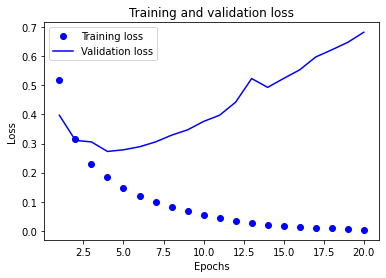

In [12]:

import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

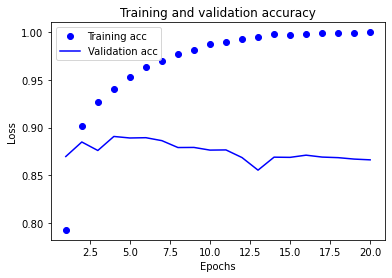

In [13]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
#new model using 4 epochs
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.5508 - accuracy: 0.7375
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2685 - accuracy: 0.9062
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2009 - accuracy: 0.9310
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3215 - accuracy: 0.8730


In [15]:
#results of naive approach
results

[0.32153692841529846, 0.8729599714279175]

In [16]:
#using trained network to generate predictions on new data
model.predict(x_test)

array([[0.27416345],
       [0.9997012 ],
       [0.97655076],
       ...,
       [0.18231839],
       [0.15986568],
       [0.7800609 ]], dtype=float32)

## News classifier 
### 5.2

In [17]:
#importing data set
from keras.datasets import reuters
#splitting data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [18]:
print(len(train_data))
print(len(test_data))

8982
2246


In [20]:
#data prep using same vectorizer from 5.1
# Our vectorized training data
x_train = vectorize_sequence(train_data)
# Our vectorized test data
x_test = vectorize_sequence(test_data)

In [21]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [22]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [23]:
#building model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
#validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 3.1424 - accuracy: 0.3662 - val_loss: 1.7362 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.5376 - accuracy: 0.6828 - val_loss: 1.2827 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0852 - accuracy: 0.7680 - val_loss: 1.1113 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8161 - accuracy: 0.8267 - val_loss: 1.0133 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6506 - accuracy: 0.8619 - val_loss: 0.9426 - val_accuracy: 0.8110
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5177 - accuracy: 0.8932 - val_loss: 0.9051 - val_accuracy: 0.8190
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4022 - accuracy: 0.9205 - val_loss: 0.8954 - val_accuracy: 0.8220
Epoch 8/20
16

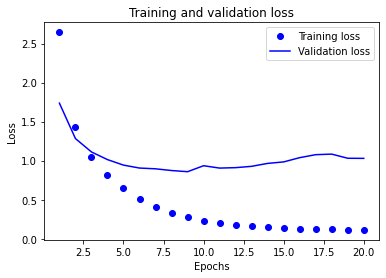

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

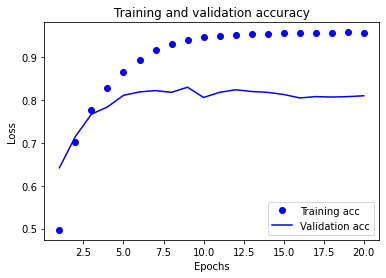

In [31]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 29ms/step - loss: 3.2018 - accuracy: 0.3955 - val_loss: 1.7802 - val_accuracy: 0.6520
Epoch 2/8
16/16 [==============================] - 0s 15ms/step - loss: 1.5378 - accuracy: 0.7019 - val_loss: 1.3209 - val_accuracy: 0.7190
Epoch 3/8
16/16 [==============================] - 0s 15ms/step - loss: 1.0653 - accuracy: 0.7768 - val_loss: 1.1394 - val_accuracy: 0.7580
Epoch 4/8
16/16 [==============================] - 0s 15ms/step - loss: 0.7995 - accuracy: 0.8326 - val_loss: 1.0440 - val_accuracy: 0.7740
Epoch 5/8
16/16 [==============================] - 0s 15ms/step - loss: 0.6331 - accuracy: 0.8654 - val_loss: 0.9673 - val_accuracy: 0.7870
Epoch 6/8
16/16 [==============================] - 0s 14ms/step - loss: 0.5182 - accuracy: 0.8915 - val_loss: 0.9269 - val_accuracy: 0.8030
Epoch 7/8
16/16 [==============================] - 0s 15ms/step - loss: 0.4055 - accuracy: 0.9180 - val_loss: 0.9358 - val_accuracy: 0.7990
Epoch 8/8
71/71 [===

In [33]:
#results of naive model
print(results)

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

[0.9781224727630615, 0.7822796106338501]


0.188780053428317

## Housing Prices
### 5.3

In [34]:
#import data
from keras.datasets import boston_housing
#split data
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [35]:
#data prep

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [36]:
#building model
def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [37]:
#validation of modal
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [38]:
print(all_scores)
print(np.mean(all_scores))

[2.058684825897217, 2.555415391921997, 2.7275359630584717, 2.690248489379883]
2.507971167564392


In [39]:
from keras import backend as K
# Some memory clean-up
K.clear_session()

In [43]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    #history_dict = history.history
    #print(history_dict.keys())
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [44]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

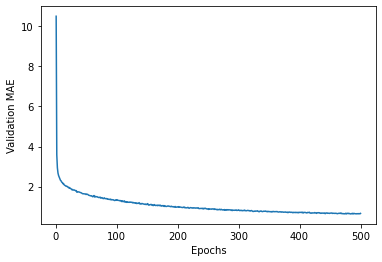

In [45]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

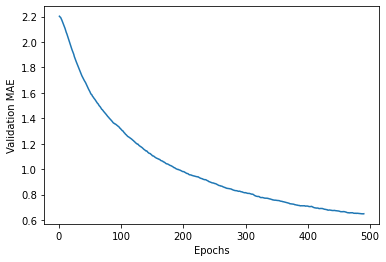

In [46]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [47]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 17.3950 - mae: 2.7017


In [48]:
test_mae_score


2.701674699783325